In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import glob
import os
import math
from os import listdir
import data_visualization as dv
import dill
import scipy 
from scipy.stats import norm
from scipy import stats
from tqdm import tqdm 
import random
import sys

wheel = dv.ColorWheel()

In [8]:
sys.path.insert(0, r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp1\Scripts\Analysis_and_Statistics') 
from plot_functions import *
from Subject_Object import *

# Initial Thangs

In [9]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir('D:\\Subject_Data\\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
SAVE_PATH = r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Group_Figures\Exp1\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
os.chdir('D:\Subject_Data\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)

task_name = 'Seth_MatchPennies_Agent_Exp1'
tp3_title = "1000 (50)"
tp4_title = "1000 (150)"
tp5_title = '1100 (50)'
tp6_title = "1100 (150)"
tp7_title = "1200 (50)"
tp8_title = '1200 (150)'
trial_block_titles = ["1000 (50)", "1000 (150)", '1100 (50)',"1100 (150)", "1200 (50)",  '1200 (150)']
num_blocks = len(trial_block_titles)


num_subjects

20

# Pickle Objects

In [10]:
NUM_STDS = 2
append_dict = {0:'reaction_time_no_sd_off',1:'reaction_time_minus_sd',2:'reaction_time_minus_2sd'}
load_path = r'D:\Subject_Data\Seth_MatchPennies_Agent_Exp1\Subjects_Analyzed\\'
subject = dill.load((open(load_path + f'subject_object_{append_dict[NUM_STDS]}_dict.pkl', 'rb')))
group = dill.load((open(load_path + f'group_object_{append_dict[NUM_STDS]}.pkl', 'rb')))
group.analyze_data()

C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp1\Scripts\Analysis_and_Statistics\Subject_Object.py:556: RuntimeWarning: Mean of empty slice
  self.perc_binned_player_wins_mean                      = np.nanmean(self.combine_all_subjects('perc_binned_player_wins'),axis = 0)
C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp1\Scripts\Analysis_and_Statistics\Subject_Object.py:557: RuntimeWarning: Mean of empty slice
  self.perc_binned_player_indecisions_mean               = np.nanmean(self.combine_all_subjects('perc_binned_player_indecisions'),axis = 0)
C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp1\Scripts\Analysis_and_Statistics\Subject_Object.py:558: RuntimeWarning: Mean of empty slice
  self.perc_binned_player_incorrects_mean                = np.nanmean(self.combine_all_subjects('perc_binned_player_incorrects'),axis

# Set Save 

In [11]:
save = False

# Histograms

# Box Plots

Decision Times

In [12]:
group.combine_all_subjects('player_task_decision_time_first_half').shape

(20, 6, 40)

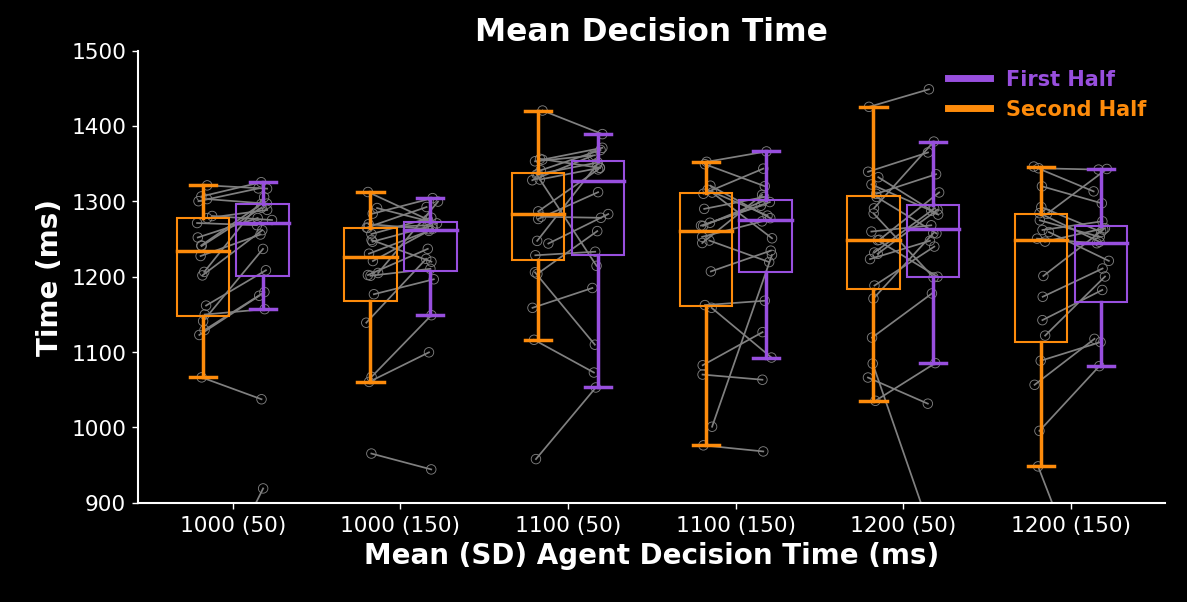

In [13]:
metric1 = group.combine_all_subjects('player_task_decision_time_first_half_mean') 
metric2 = group.combine_all_subjects('player_task_decision_time_second_half_mean') 

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(900,1600,100)
bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.rak_orange)
multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-bw/1.75,bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1[:,j],metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Decision Time')

dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.purple,wheel.rak_orange],fontsize=12)

axmain.set_axis_off()
plt.show()

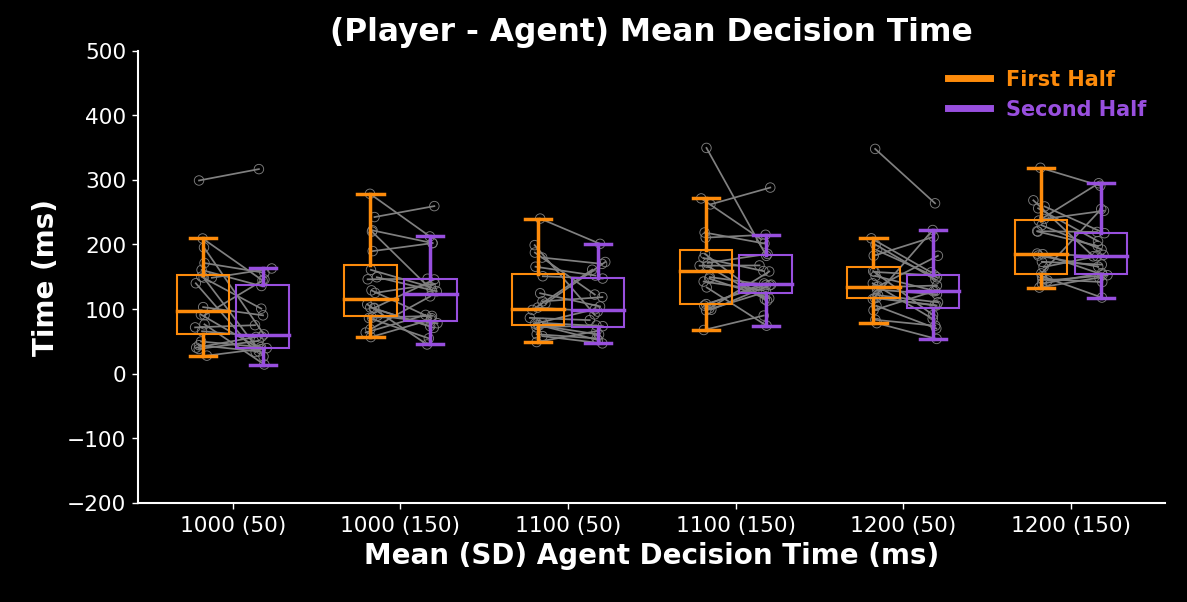

In [14]:
metric1 = group.combine_all_subjects('player_minus_agent_task_decision_time_first_half_mean') 
metric2 = group.combine_all_subjects('player_minus_agent_task_decision_time_second_half_mean') 

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(-200,600,100)
bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.rak_orange)
multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-bw/1.75,bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1[:,j],metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('(Player - Agent) Mean Decision Time')

dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.rak_orange,wheel.purple],fontsize=12)

axmain.set_axis_off()
plt.show()

In [15]:
group.combine_all_subjects('player_minus_agent_task_decision_time_mean')

array([[ 181.17032776,  203.25393753,  131.79480057,   66.33017426,
         -50.40628357,   47.9228035 ],
       [ 274.82101898,  275.58183441,  225.62497711,  196.89125366,
         131.36756439,  147.11627579],
       [ 253.0196991 ,  220.34324036,  202.73596191,   12.47504044,
         102.85579987,   34.00583496],
       [  44.89885788,   67.86847229,  -97.77235565,  -12.93613358,
        -148.00786591,  -63.6880722 ],
       [ 277.85028534,  283.63464127,  248.53265839,  187.50136261,
          82.05191498,   49.71979218],
       [ 155.27294769,  107.72575378,   81.56692276,  200.77129211,
          16.99985352,  -86.21082458],
       [ 320.02233505,  253.26285629,  266.8091301 ,  264.83717041,
         237.26082254,  105.79119644],
       [ 200.13767776,  217.82856216,  183.42456055,   29.85291367,
          37.91617126, -128.43260574],
       [ 268.55118484,  261.01731873,  257.20237732,  232.02794189,
         126.24322357,  142.17104416],
       [ 277.02274399,  265.84598541,